# Detector Evaluation

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
""" 
    Calculates the overlap area between two box
    Parameters
    ----------
    k: image number
    i, j: coordinate(row colonne) of the upper left corner of the box
    h, l: size (height, width) of the box
    s: detection score
"""

In [353]:
class Box:
    def __init__(self, n_image, i, j, h, l, s=0):
        self.n_image = n_image
        self.true_positive = False
        self.x = j
        self.y = i
        self.height = h
        self.width = l
        self.score = s
        
    def __lt__(self, box):
        return self.score < box.score
    
    def intersect_over_union(self, box):
        width_intersect = min(self.x + self.width, box.x + box.width) - max(self.x, box.x)
        height_intersect = min(self.y + self.height, box.y + box.height) - max(self.y, box.y)
        # no overleap
        if width_intersect <= 0 or height_intersect <=0:
            return 0
        else:
            I = width_intersect * height_intersect
            # Union = Total area - Intersection
            U = self.height * self.width + box.height * box.width - I
            return I / U    
    # test if a box is true positive
    def test_true_positive(self, label_box, rate = 0.5):
        if self. intersect_over_union(label_box) > rate:
            self.true_positive = True
    
class Image:
    def __init__(self, number):
        self.number = number
        self.boxs = []
    def add_box(self, box):
        self.boxs.append(box)
    # remove duplicate and keep only the one with the best score
    def sort_boxs_by_score(self):
        self.boxs.sort(key=lambda box: box.score, reverse=True)
    def remove_duplicates_boxs(self, rate=0.5):
        self.sort_boxs_by_score()
        for box_1 in self.boxs:
            for box_2 in self.boxs[self.boxs.index(box_1) + 1 :]:
                if box_1.intersect_over_union(box_2) > rate:
                    self.boxs.remove(box_2)

In [362]:
class detector_evaluation:
    def __init__(self):
        # data trating
        colnames=['n_image', 'i', 'j', 'h', 'l', 's'] 
        self.result_train = pd.read_csv("results_train_500.txt", sep=' ', names=colnames, header=None, index_col=0)
        self.box_set = {}
        self.labels_train =   pd.read_csv("/Users/yunfei/Desktop/GI05/SY32/projet/project_train/label_train.txt", sep=' ', names=["n_image", "i", "j", "h", "l"], header=None, index_col=0)
        for n_image, values in self.result_train.iterrows():
            if self.box_set.get(n_image):
                self.box_set.get(n_image).add_box(Box(n_image, values.i, values.j, values.h, values.l, values.s))
            else:
                image = Image(n_image)
                image.add_box(Box(n_image, values.i, values.j, values.h, values.l, values.s))
                self.box_set[n_image] = image
        # remove duplicate image and defin true positive
        for image in self.box_set.values():
            image.remove_duplicates_boxs()
            TP_boxs = self.labels_train.loc[[image.number]]
            for TP_box in TP_boxs.values:
                for box in image.boxs:
                    box.test_true_positive(
                        Box(
                            image.number,
                            TP_box[0],
                            TP_box[1],
                            TP_box[2],
                            TP_box[3]
                        )
                    )
        
    # count number of boxs in the box_set
    def count(self):
        return sum(len(image.boxs) for image in self.box_set.values())
    def count_FN(self):
        return sum(box.true_positive for images in self.box_set.values() for box in images.boxs)
    # precision and recall analyse
    def prec_rec(self):  
        len_images = self.count()
        self.prec = np.zeros(len_images)
        self.rec = np.zeros(len_images)
        TP = 0
        FP = 0
        FN = self.count_FN()
        boxs = []
        for images in self.box_set.values():
            for box in images.boxs:
                boxs.append(box)
        idx = np.argsort(boxs)
        for k, i in enumerate(idx):
            if boxs[i].true_positive == True:
                TP += 1
                FN -= 1
            else:
                FP +=1
            self.prec[k] = TP/(TP + FP)
            self.rec[k] = TP/(TP + FN)
        plt.plot(self.rec, self.prec)
        plt.xlim((0,1))
        plt.ylim((0,1))
        plt.xlabel('Rappel')
        plt.ylabel('Précision')
        plt.show()
    
        
                
                

In [352]:
class A:
    def __init__(self, v):
        self.v = v
    def __lt__(self, a):
        return self.v<a.v
        
b = A(1)
c = A(2)
d = A(3)
k = []
k.append(b)
k.append(d)
k.append(c)
idx = np.argsort(k)
idx

array([0, 2, 1])

In [293]:
labels_train =   pd.read_csv("/Users/yunfei/Desktop/GI05/SY32/projet/project_train/label_train.txt", sep=' ', names=["n_image", "i", "j", "h", "l"], header=None, index_col=0)
a = 501
t = labels_train.loc[[a]]
type(t)


pandas.core.frame.DataFrame

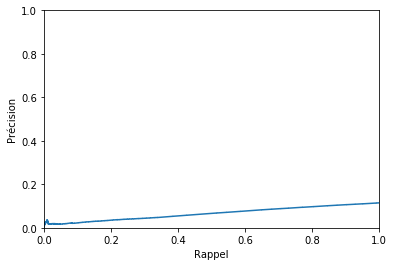

In [363]:
if __name__=="__main__":
    de = detector_evaluation()
    de.prec_rec()

In [308]:
result_train = pd.read_csv("results_train_500.txt", sep=' ', names=colnames, header=None, index_col=0)
len(result_train.loc[[501]])





11

In [322]:
for i in range(11):
    print(de.box_set[502].boxs[i].true_positive)

False
True
True
False
False
False
False
False
False


IndexError: list index out of range

In [325]:
for i in enumerate([1,2,3]):
    print(i)

(0, 1)
(1, 2)
(2, 3)
